<a href="https://colab.research.google.com/github/simpykumarimandal/Mern/blob/main/Copy_of_std.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = '/content/drive/MyDrive/Rice Leaf Disease Images'
augmented_path = '/content/drive/MyDrive/augimg'



In [ ]:
disease_folders = os.listdir(dataset_path)

# Function to count the number of original images in a disease folder
def count_original_images(disease_name):
    # Get path to the images for the given disease
    disease_folder_path = os.path.join(dataset_path, disease_name)
    # Get list of all .jpg images in the disease folder (adjust file type if necessary)
    image_paths = glob(os.path.join(disease_folder_path, '*.jpg'))  # Assuming images are in .jpg format
    return len(image_paths)

# Count and display the number of original images for each disease
for disease in disease_folders:
    num_original_images = count_original_images(disease)
    print(f"{disease} has {num_original_images} original images.")

Brownspot has 1650 original images.
Blast has 928 original images.
Tungro has 424 original images.
Bacterialblight has 1326 original images.


In [ ]:
!pip install albumentations opencv-python-headless


In [ ]:
import albumentations as A
from albumentations.augmentations.transforms import *
from albumentations.core.composition import OneOf
import cv2
import os
from glob import glob


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
# Define augmentation pipeline
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.GaussNoise(var_limit=(10, 50), p=0.3),
    A.Blur(blur_limit=3, p=0.3),
])

In [ ]:
# Function to augment images and save
def augment_images(input_folder, output_folder, augmentations=10):
    os.makedirs(output_folder, exist_ok=True)
    image_paths = glob(os.path.join(input_folder, '*.jpg'))  # Assumes images are in JPG format

    for img_path in image_paths:
        image = cv2.imread(img_path)
        if image is None:
            print(f"Failed to read image: {img_path}")
            continue

        base_name = os.path.basename(img_path).split('.')[0]
        for i in range(augmentations):
            augmented = transform(image=image)['image']
            output_path = os.path.join(output_folder, f"{base_name}_aug_{i+1}.jpg")
            cv2.imwrite(output_path, augmented)



In [ ]:
# Iterate over each disease folder
def process_dataset(dataset_path, augmented_path, augmentations=10):
    disease_folders = os.listdir(dataset_path)
    for disease in disease_folders:
        input_folder = os.path.join(dataset_path, disease)
        output_folder = os.path.join(augmented_path, disease)
        print(f"Processing: {disease}")
        augment_images(input_folder, output_folder, augmentations)

In [ ]:
# Paths to dataset
dataset_path = '/content/drive/MyDrive/Rice Leaf Disease Images'
augmented_path = '/content/drive/MyDrive/augimg'

# Augment the dataset
process_dataset(dataset_path, augmented_path, augmentations=10)


Processing: Brownspot


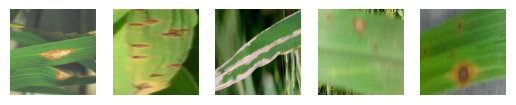

In [ ]:
import matplotlib.pyplot as plt
import random

# Visualize augmented images
augmented_images = glob(os.path.join(augmented_path, '*', '*.jpg'))
random_images = random.sample(augmented_images, 5)

for i, img_path in enumerate(random_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


In [ ]:
# Get list of all disease categories
disease_folders = os.listdir(augmented_path)

# Function to count augmented images for each disease
def count_augmented_images(disease_name):
    # Get paths to augmented images for the given disease
    disease_folder_path = os.path.join(augmented_path, disease_name)
    image_paths = glob(os.path.join(disease_folder_path, '*.jpg'))  # Assuming images are in .jpg format

    return len(image_paths)

# Count and display the number of augmented images for each disease
for disease in disease_folders:
    num_images = count_augmented_images(disease)
    print(f"{disease} has {num_images} augmented images.")

Brownspot has 16500 augmented images.
Blast has 9280 augmented images.
Tungro has 4240 augmented images.
Bacterialblight has 13110 augmented images.
